In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data = np.array(data)

# Shuffle
np.random.shuffle(data)

# Split into dev and train
m, n = data.shape
data_dev = data[0:1000].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n] / 255.0  # Normalize pixel values

data_train = data[1000:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n] / 255.0  # Normalize

In [4]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def dRelu(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = dZ2.dot(A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = dZ1.dot(X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {acc}")

    return W1, b1, W2, b2


In [5]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration 0: Accuracy = 0.10073170731707318
Iteration 10: Accuracy = 0.11331707317073171
Iteration 20: Accuracy = 0.11602439024390244
Iteration 30: Accuracy = 0.19002439024390244
Iteration 40: Accuracy = 0.3317317073170732
Iteration 50: Accuracy = 0.3719268292682927
Iteration 60: Accuracy = 0.3441463414634146
Iteration 70: Accuracy = 0.3438780487804878
Iteration 80: Accuracy = 0.3868536585365854
Iteration 90: Accuracy = 0.44565853658536586
Iteration 100: Accuracy = 0.5147804878048781
Iteration 110: Accuracy = 0.5777560975609756
Iteration 120: Accuracy = 0.6264878048780488
Iteration 130: Accuracy = 0.6669268292682927
Iteration 140: Accuracy = 0.7004390243902439
Iteration 150: Accuracy = 0.7276585365853658
Iteration 160: Accuracy = 0.7499268292682927
Iteration 170: Accuracy = 0.7674634146341464
Iteration 180: Accuracy = 0.7841951219512195
Iteration 190: Accuracy = 0.7969756097560976
Iteration 200: Accuracy = 0.8089024390243903
Iteration 210: Accuracy = 0.8185365853658536
Iteration 220: A

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(X, Y, index, W1, b1, W2, b2):
    current_image = X[:, index].reshape(-1, 1)  # shape (784, 1)
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    
    print("Prediction:", prediction[0])
    print("Label:", label)

    # Reshape and rescale for display
    image_display = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image_display, interpolation='nearest')
    plt.title(f"Predicted: {prediction[0]} | Actual: {label}")
    plt.axis("off")
    plt.show()


Prediction: 2
Label: 2


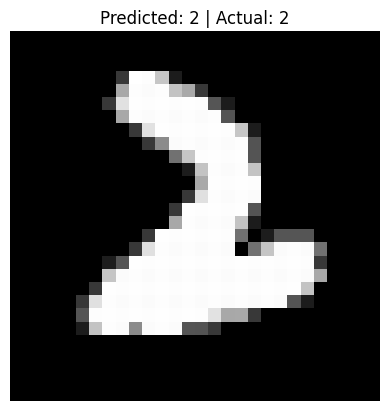

In [7]:
test_prediction(X_train, Y_train, index=1234, W1=W1, b1=b1, W2=W2, b2=b2)


In [8]:
# Forward pass
_, _, _, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)

# Predictions
predictions = get_predictions(A2_dev)

# Accuracy
accuracy = get_accuracy(predictions, Y_dev)
print(f"Final Dev Set Accuracy: {accuracy * 100:.2f}%")

Final Dev Set Accuracy: 88.70%


In [9]:
# Save each parameter as a separate .npy file
np.save('W1.npy', W1)
np.save('b1.npy', b1)
np.save('W2.npy', W2)
np.save('b2.npy', b2)
